In [1]:
import numpy as np, prjlib, binning as bins, plottools as pl
from matplotlib.pyplot import *

In [2]:
p1, __ = prjlib.filename_init(doreal='True',dearot='True',stype='lcmb',ver='v1')
p2, __ = prjlib.filename_init(doreal='True',dearot='True',stype='lcmb',ver='v2')
mb = bins.multipole_binning(10,lmin=20,lmax=2048,spc='p2')
oc1 = prjlib.binned_cl(p1.quad.f['EB'].cl[0],mb)
oc2 = prjlib.binned_cl(p2.quad.f['EB'].cl[0],mb)
sc1 = prjlib.binned_cl_rlz(p1.quad.f['EB'].cl,1,200,mb)
sc2 = prjlib.binned_cl_rlz(p2.quad.f['EB'].cl,1,200,mb)
mc1 = np.mean(sc1,axis=0)
mc2 = np.mean(sc2,axis=0)
vc1 = np.std(sc1,axis=0)
vc2 = np.std(sc2,axis=0)

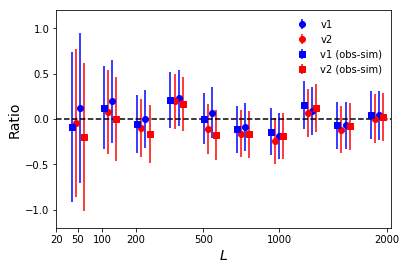

In [3]:
pl.plot_1dstyle(ylab=r'Ratio',spc='p2',xmin=20,xmax=2048,ymin=-1.2,ymax=1.2)
s = 1e4*(180/np.pi)**2
errorbar(np.sqrt(mb.bc)+0.5,s*oc1,yerr=s*vc1,label='v1',fmt='o',color='b')
errorbar(np.sqrt(mb.bc),s*oc2,yerr=s*vc2,label='v2',fmt='o',color='r')
errorbar(np.sqrt(mb.bc)-0.5,s*(oc1-mc1),yerr=s*vc1,label='v1 (obs-sim)',color='b',fmt='s')
errorbar(np.sqrt(mb.bc)+1,s*(oc2-mc2),yerr=s*vc2,label='v2 (obs-sim)',color='r',fmt='s')
axhline(0,color='k',ls='--')
legend(loc=0)